# Secure Learning

## Game Specification 

According to [1] we can model a secure learning system as a game between an attacker and a defender - The attacker wants to manipualte or evade a learning algorithm choosen by the defender. 

1. __Defender__ Choose learning algorithm $H$ for selecting hypotheses based on observed data

2. __Attacker__ Choose attack procedures $A^{(train)}$ and $A^{(eval)}$ (potentially with knowledge of $H$)

3. Learning:
    + Obtain dataset 

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Read data
mnist = input_data.read_data_sets("../Machine_learning/Tensorflow/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Please write your own downloading logic.


Instructions for updating:
Please write your own downloading logic.


Instructions for updating:
Please use tf.data to implement this functionality.


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting ../Machine_learning/Tensorflow/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting ../Machine_learning/Tensorflow/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.


Instructions for updating:
Please use tf.one_hot on tensors.


Extracting ../Machine_learning/Tensorflow/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../Machine_learning/Tensorflow/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
def layer(input, weigth_shape, bias_shape):
    w_init = tf.random_normal_initializer(stddev= (2.0/weigth_shape[0]) ** 0.5)
    bias_init = tf.constant_initializer(value=0)
    W = tf.get_variable("W", weigth_shape, initializer = w_init)
    b = tf.get_variable("b", bias_shape, initializer = bias_init)
    return tf.nn.relu(tf.matmul(input, W) + b)

def inference(x):     
    with tf.variable_scope("hidden_1"):
        hidden_1 = layer(x , [784, 256], [256])
    with tf.variable_scope("hidden_2"):
        hidden_2 = layer(hidden_1, [256, 256], [256])
    with tf.variable_scope("output"):
        output = layer(hidden_2, [256, 10], [10])
    return output

def loss(output, y):
    xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=output, labels=y)
    loss = tf.reduce_mean(xentropy)
    return loss

def evaluate(output, y):
    correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar("validation", accuracy)
    return accuracy

def training(cost, global_step):
    tf.summary.scalar("cost", cost)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(cost, global_step=global_step)
    return train_op

import tensorflow as tf
# Parameters

learning_rate = 0.01
training_epochs = 300
batch_size = 100
display_step = 5
train_losses, test_losses = [], []


with tf.Graph().as_default():
    # mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784])    
    # 0-9 digits recognition => 10 classes
    y = tf.placeholder(tf.float32, [None, 10])    
    output = inference(x)    
    cost = loss(output, y) 
    
    global_step = tf.Variable(0, name='global_step', trainable=False)    
    train_op = training(cost, global_step)    
    eval_op = evaluate(output, y)
    
    summary_op = tf.summary.merge_all()    
    saver = tf.train.Saver()
    
    sess = tf.Session()    
    summary_writer = tf.summary.FileWriter("mnist_logs/", graph=sess.graph)
    
    init_op = tf.global_variables_initializer()    
    sess.run(init_op)
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            mbatch_x, mbatch_y = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            feed_dict = {x : mbatch_x, y : mbatch_y}
            sess.run(train_op, feed_dict=feed_dict)
            # Compute average loss
            minibatch_cost = sess.run(cost, feed_dict=feed_dict)
            avg_cost += minibatch_cost/total_batch
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            val_feed_dict = {
                x : mnist.validation.images,
                y : mnist.validation.labels
            }
            accuracy = sess.run(eval_op, feed_dict=val_feed_dict)
            print ("Validation Error:", (1 - accuracy))
            train_losses.append(1 - accuracy)
            summary_str = sess.run(summary_op, feed_dict=feed_dict)
            summary_writer.add_summary(summary_str, sess.run(global_step))
            
            saver.save(sess, "mnist_logs/model-checkpoint", global_step=global_step)
            
    print("Optimization Finished!")
    
    test_feed_dict = {
        x : mnist.test.images,
        y : mnist.test.labels
    }
    accuracy = sess.run(eval_op, feed_dict=test_feed_dict)
    #writer = tf.summary.FileWriter("logistic_logs3/", graph=sess.graph)
    #writer.add_graph(tf.get_default_graph())
    print("Test Accuracy:", accuracy)
    
    save_path = saver.save(sess, "/tmp/model.ckpt")
    print("Model saved in path: %s" % save_path)

Validation Error: 0.18379998207092285
Validation Error: 0.06440001726150513
Validation Error: 0.04839998483657837
Validation Error: 0.04119998216629028
Validation Error: 0.03539997339248657
Validation Error: 0.03280001878738403
Validation Error: 0.028199970722198486
Validation Error: 0.027199983596801758
Validation Error: 0.0252000093460083
Validation Error: 0.025799989700317383
Validation Error: 0.02399998903274536
Validation Error: 0.023599982261657715
Validation Error: 0.022599995136260986
Validation Error: 0.022599995136260986
Validation Error: 0.02340000867843628
Validation Error: 0.022599995136260986
Validation Error: 0.021799981594085693
Validation Error: 0.02240002155303955
Validation Error: 0.02060002088546753
Validation Error: 0.02120000123977661
Validation Error: 0.02039998769760132
Validation Error: 0.02060002088546753
Validation Error: 0.02120000123977661
Validation Error: 0.019599974155426025
Validation Error: 0.020200014114379883
Validation Error: 0.019800007343292236
Va

### test model versus adversial data

In [38]:
mnist.test.images[0].shape

(784,)

In [58]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
img=cv2.imread('output/fig3.png')
img.shape

(288, 432, 3)

In [59]:
from scipy import ndimage, misc
ok = misc.imresize(img,(28,28))

D:\Usuarios\rhaps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [60]:
plt.imshow(img.reshape(28,28), cmap="gray_r")

ValueError: cannot reshape array of size 373248 into shape (28,28)

ValueError: too many values to unpack (expected 2)

<Figure size 432x288 with 0 Axes>

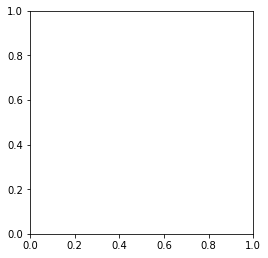

In [55]:
plt.gray() # Queremos las imágenes en grises
plt.matshow(ok) # Imprimir una imagen dada

In [11]:
img_raw = tf.io.read_file("output/fig1.png")
    
with tf.Graph().as_default():
    
    test_feed_dict = {
        x : mnist.test.images,
        y : mnist.test.labels
    }

In [4]:
with tf.Graph().as_default():
    tf.ex
    tf.reset_default_graph()
    # mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784])    
    # 0-9 digits recognition => 10 classes
    y = tf.placeholder(tf.float32, [None, 10])    
    output = inference(x) 
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        saver.restore(sess, "/tmp/model.ckpt")
        print("Model restored")
        


AssertionError: Do not use tf.reset_default_graph() to clear nested graphs. If you need a cleared graph, exit the nesting and create a new graph.

## References

+ [1] Huang, L., Joseph, A. D., Nelson, B., Rubinstein, B. I., & Tygar, J. D. (2011, October). Adversarial machine learning. In Proceedings of the 4th ACM workshop on Security and artificial intelligence (pp. 43-58). ACM.